In [1]:
#Data
import pandas as pd
import numpy as np
import random

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (GradientBoostingClassifier, GradientBoostingRegressor, 
                              RandomForestClassifier, RandomForestRegressor)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve



# for regressions:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as sklm

# for KNN:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#for modeling with decision trees:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, \
    RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier

#for model evaluation and pre-processing tools:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

#for plotting confusion matrix:
import scikitplot as skplt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pd.set_option('display.max_rows', None)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train['Cabin'].isnull().sum()

687

In [7]:
train.drop('PassengerId',axis=1,inplace=True)

In [8]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1, 'train feature corr')

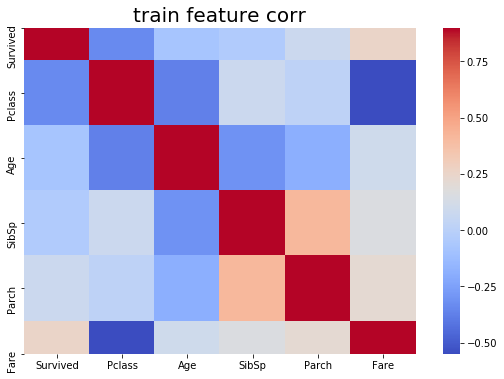

In [9]:
fig, ax = plt.subplots(figsize=[10,6])
sns.heatmap(train.corr(),cmap='coolwarm',ax=ax, vmax=.9, square=True)
ax.set_title('train feature corr', fontsize=20)

## Exploratory Analysis

### 1. Age

In [10]:
train.Age.fillna(-10,inplace=True)

Text(0.5, 0, '')

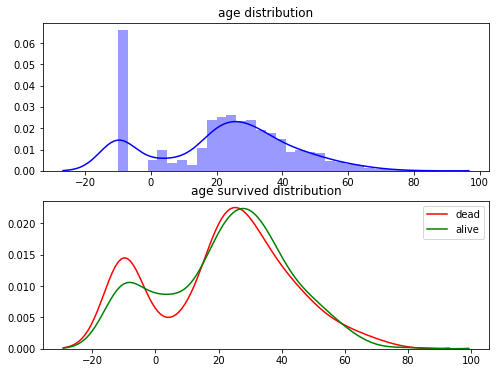

In [11]:
fig, axes = plt.subplots(2,1,figsize=(8,6))

sns.distplot(train['Age'],bins=30,color='blue',ax=axes[0])
ax0 = axes[0]
ax0.set_title('age distribution')
ax0.set_xlabel('')

ax1 = axes[1]
ax1.set_title('age survived distribution')
k1 = sns.distplot(train[train.Survived==0].Age, hist=False, color='r', ax=ax1, label='dead')
k2 = sns.distplot(train[train.Survived==1].Age, hist=False, color='g', ax=ax1, label='alive')
ax1.set_xlabel('')

#### *  most of the passagner are aged 20-40
#### *  the survived group has less missing age information than the unsurvived group

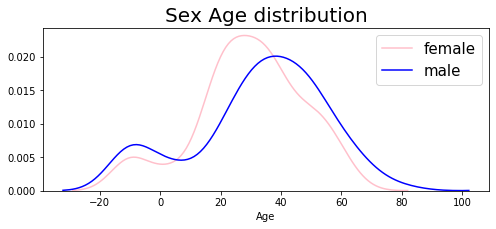

In [12]:
f, ax = plt.subplots(figsize=(8,3))
ax.set_title('Sex Age distribution', size=20)
sns.distplot(train[train.Sex=='female'].dropna().Age, hist=False, color='pink', label='female')
sns.distplot(train[train.Sex=='male'].dropna().Age, hist=False, color='blue', label='male')
ax.legend(fontsize=15)

#### * 0-5 age group, male is more than female
#### * 5-40 age group, female is more.
#### * 40-80 age group, male is more.

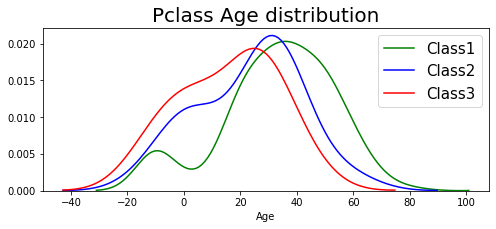

In [13]:
f, ax = plt.subplots(figsize=(8,3))
ax.set_title('Pclass Age distribution', size=20)
sns.distplot(train[train.Pclass==1].dropna().Age, hist=False, color='green', label='Class1')
sns.distplot(train[train.Pclass==2].dropna().Age, hist=False, color='blue', label='Class2')
sns.distplot(train[train.Pclass==3].dropna().Age, hist=False, color='red', label='Class3')
ax.legend(fontsize=15)

#### * older passenger -->more in upper class 

### 2. Pclass

In [14]:
pclass_dead = train[train['Survived']==0].groupby('Pclass')['Survived'].count()
pclass_survive = train[train['Survived']==1].groupby('Pclass')['Survived'].count()

In [15]:
pclass_dead

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

In [16]:
pclass_survive

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Pclass survived distribution')

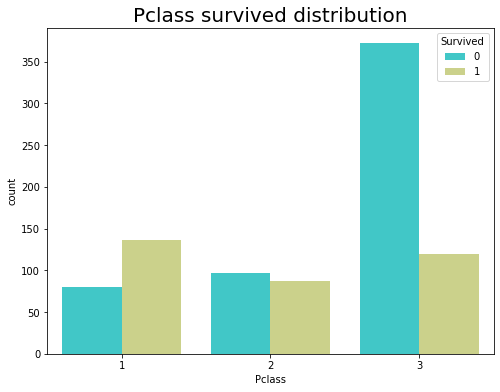

In [17]:
f, ax = plt.subplots(figsize=(8,6))
ax=sns.countplot(x='Pclass',hue='Survived',data=train,palette = 'rainbow')
ax.set_title('Pclass survived distribution', size=20)

#### * Most passengers on the ship are class 3
#### * Class 1 has the highest survival rate, and class 3 has the lowest survival rate

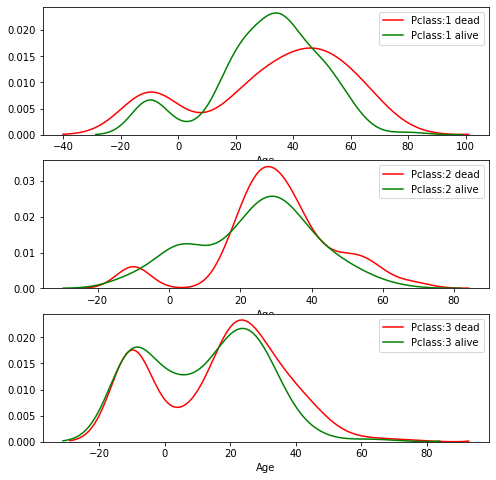

In [18]:
fig, axes = plt.subplots(3,1,figsize=(8,8))
ax.set_title('Class Age survival distribution',size=20)
ax.set_xlabel('age')
for pc in [1,2,3]:
    sns.distplot(train[(train['Pclass']==pc)&(train['Survived']==0)].Age,hist=False,color='red',ax=axes[pc-1],label='Pclass:'+ str(pc) + ' dead')
    sns.distplot(train[(train['Pclass']==pc)&(train['Survived']==1)].Age,hist=False,color='green',ax=axes[pc-1], label='Pclass:'+ str(pc) + ' alive')
    ax = axes[pc-1]


#### * For Class1 passengers, 5-45 age group has higher survival rate than the other age groups
#### * For Class2 passengers, 0-15 age group has much higher survival rate.
#### * For Class3 passengers, 0-15 age group has much higher survival rate.

### 3.Sex

In [19]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

#### * The quantity of male passengers is more than female passengers
#### * Female passengers have higher survival rate than male

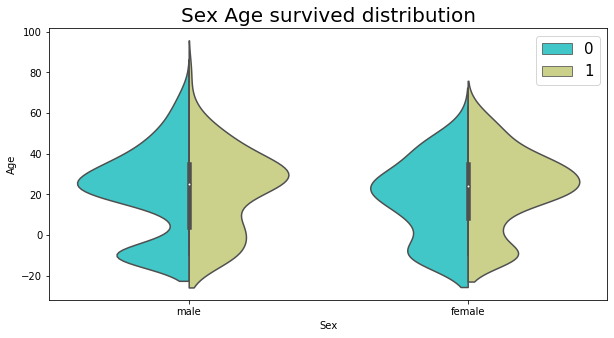

In [21]:
f, ax = plt.subplots(figsize=(10,5))
ax.set_title('Sex Age survived distribution', size=20)
sns.violinplot(data=train, y='Age', x='Sex',hue='Survived',split=True,palette='rainbow')
ax.legend(fontsize=15)

#### * For female, 20-40 age group has the highest survival rate
#### * For male, 0-20 age group has the highest survival rate

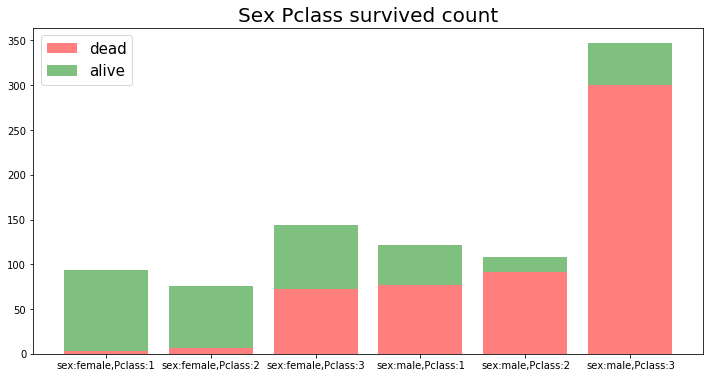

In [22]:
f, ax = plt.subplots(figsize=(12,6))
ax.set_title('Sex Pclass survived count', size=20)

label=[]
for sex_i in ['female','male']:
    for pclass_i in range(1,4):
        label.append('sex:%s,Pclass:%d'%(sex_i, pclass_i))

pos = range(6)
ax.bar( pos,
        train[train['Survived']==0].groupby(['Sex','Pclass'])['Survived'].count().values, 
        color='r', 
        alpha=0.5, 
        align='center',
        tick_label=label, 
        label='dead')
ax.bar(pos, 
        train[train['Survived']==1].groupby(['Sex','Pclass'])['Survived'].count().values, 
        bottom=train[train['Survived']==0].groupby(['Sex','Pclass'])['Survived'].count().values,
        color='g',
        alpha=0.5,
        align='center',
        tick_label=label, 
        label='alive')
ax.legend(fontsize=15)
        

#### * Across the three classes, female passengers have a higher survival rate than male passengers.
#### * Under the same sex group, the first class passengers have the highest survival rate.

### 4. Fare

(0, 300)

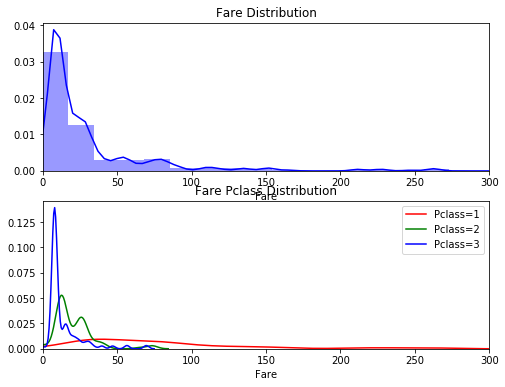

In [169]:
fig, axes = plt.subplots(2,1,figsize=(8,6))


sns.distplot(train['Fare'],bins=30,color='blue',ax=axes[0],label='Fare')
ax0 = axes[0]
ax0.set_title('Fare Distribution')
ax0.set_xlabel('Fare')
ax0.set_xlim(0,300)

ax1 = axes[1]
ax1.set_title('Fare Pclass Distribution')
k1 = sns.distplot(train[train.Pclass==1].Fare,hist=False, color='r', ax=ax1, label='Pclass=1')
k2= sns.distplot(train[train.Pclass==2].Fare,hist=False, color='g', ax=ax1, label='Pclass=2')
k3= sns.distplot(train[train.Pclass==3].Fare,hist=False, color='b',ax=ax1, label='Pclass=3')
ax1.set_xlabel('Fare')
ax1.set_xlim(0,300)

#### * Most of the passengers paid 0-50 dollars for the Fare.
#### * Pclass1 passengers paid the most expensive tickets

(0, 300)

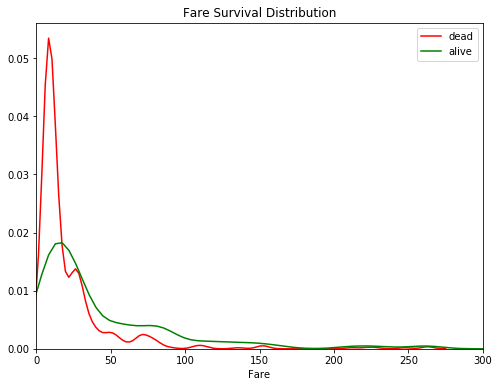

In [170]:
fig, axes = plt.subplots(figsize=(8,6))


ax=sns.distplot(train[train['Survived']==0]['Fare'],bins=30,hist=False,color='red',label='dead')
ax=sns.distplot(train[train['Survived']==1]['Fare'],bins=30,hist=False,color='green',label='alive')

ax.set_title('Fare Survival Distribution')
ax.set_xlabel('Fare')
ax.set_xlim(0,300)



#### *The survival rate of those who paid higher fare is higher than those who paid lower fare.

### 5. SibSp & Parch

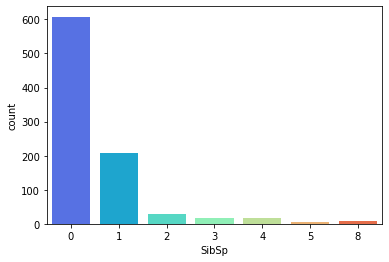

In [171]:
ax=sns.countplot(train['SibSp'],palette='rainbow',label='SibSp')

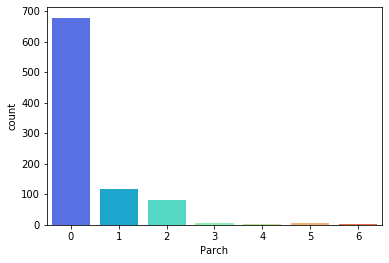

In [172]:
ax=sns.countplot(train['Parch'],palette='rainbow',label='Parch')

#### * Most of the passengers onboard have 0-1 siblings or parents with them together.

In [173]:
SibSp_survival=train.groupby('SibSp')['Survived'].mean()
SibSp_survival

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [174]:
Parch_survival=train.groupby('Parch')['Survived'].mean()
Parch_survival

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

(0, 1)

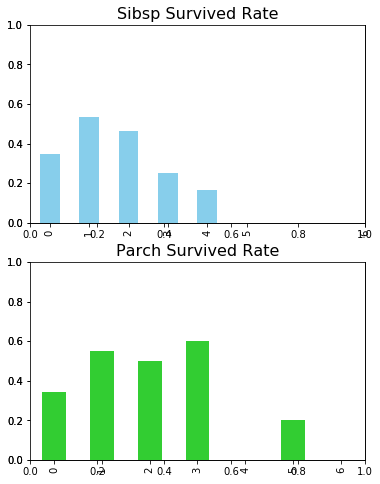

In [175]:
fig, axes = plt.subplots(2,1,figsize=(6,8))

ax1 = fig.add_subplot(211)
SibSp_survival.reset_index()['Survived'].plot(kind='bar',color='skyblue',ax=ax1)
ax1.set_title('Sibsp Survived Rate', size=16)
ax1.set_xlabel('')
ax1.set_xticks(SibSp_survival.reset_index()['SibSp'])
ax1.set_ylim(0,1)

ax2 = fig.add_subplot(212)
Parch_survival.reset_index()['Survived'].plot(kind='bar',color='limegreen',ax=ax2)
ax2.set_title('Parch Survived Rate', size=16)
ax2.set_xlabel('')
ax2.set_xticks(Parch_survival.reset_index()['Parch'])
ax2.set_ylim(0,1)

#### * Those who had 1&2 siblings/spouses onboard and those who had 1-3 parents/children onboard have higher survival rate.

### 6. Embarked

In [176]:
train['Embarked'].isnull().sum()

2

In [177]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [178]:
train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

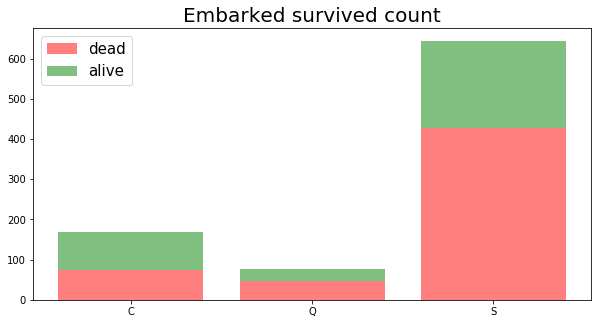

In [179]:
f, ax = plt.subplots(figsize=(10,5))
ax.set_title('Embarked survived count', size=20)


pos = range(3)
ax.bar( pos,
        train[train['Survived']==0].groupby(['Embarked'])['Survived'].count().values, 
        color='r', 
        alpha=0.5, 
        align='center',
        tick_label=['C','Q','S'], 
        label='dead')
ax.bar(pos, 
        train[train['Survived']==1].groupby(['Embarked'])['Survived'].count().values, 
        bottom=train[train['Survived']==0].groupby(['Embarked'])['Survived'].count().values,
        color='g',
        alpha=0.5,
        align='center',
        tick_label=['C','Q','S'], 
        label='alive')
ax.legend(fontsize=15, loc='best')


#### * Most of the passengers embarked at Southamption.
#### * Those who embarked at Cherbourg have higher survival rate than those who embarked at Queenstown and Southampton.

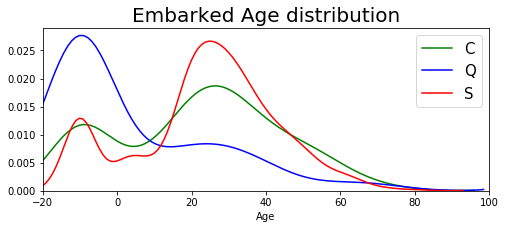

In [180]:
f, ax = plt.subplots(figsize=(8,3))
ax.set_xlim(-20,100)
ax.set_title('Embarked Age distribution', size=20)
sns.distplot(train[train.Embarked=='C'].Age, hist=False, color='green', label='C')
sns.distplot(train[train.Embarked=='Q'].Age, hist=False, color='blue', label='Q')
sns.distplot(train[train.Embarked=='S'].Age, hist=False, color='red', label='S')
ax.legend(fontsize=15)

#### * Those who embarked at Queenstown has the most missing records of age.
#### * The age distribution between those who embarked at C and Q is very similar, except those who embarked at C has a more flatten curve.

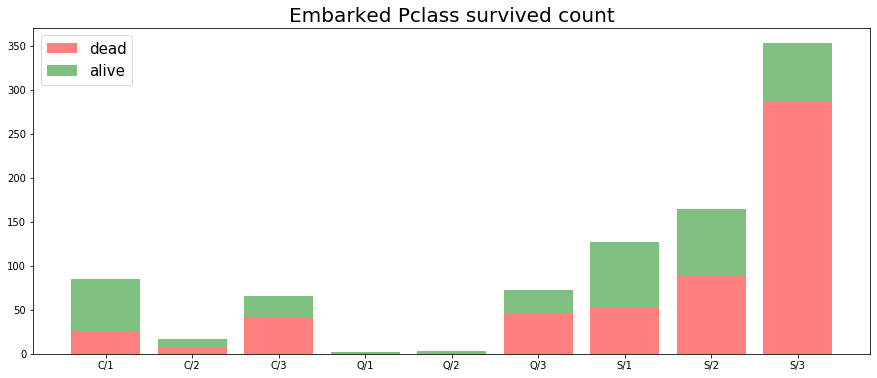

In [181]:
f, ax = plt.subplots(figsize=(15,6))
ax.set_title('Embarked Pclass survived count', size=20)

label=[]
for Embarked_i in ['C','Q','S']:
    for pclass_i in range(1,4):
        label.append('%s/%d'%(Embarked_i, pclass_i))

pos = range(9)
ax.bar( pos,
        train[train['Survived']==0].groupby(['Embarked','Pclass'])['Survived'].count().values, 
        color='r', 
        alpha=0.5, 
        align='center',
        tick_label=label, 
        label='dead')

ax.bar(pos, 
    train[train['Survived']==1].groupby(['Embarked','Pclass'])['Survived'].count().values, 
    bottom=train[train['Survived']==0].groupby(['Embarked','Pclass'])['Survived'].count().values,
    color='g',
    alpha=0.5,
    align='center',
    tick_label=label, 
    label='alive')

ax.legend(fontsize=15, loc='best')

#### * Most of the passengers embarked at C are first class while most of the passengers embarked at Q&S are third class.(Does that mean Cherburgh is where most rich people live??)
#### * The survival rate of the first class passengers embarked at C is higher than that of the first class passengers embarked at S.

### 7. Cabin

In [182]:
train['Cabin'].isnull().sum()

687

#### * A lot of missing value from this column.

In [183]:
train['Cabin_missing']='0'

In [184]:
train.loc[train['Cabin'].isnull(), 'Cabin_missing']=1

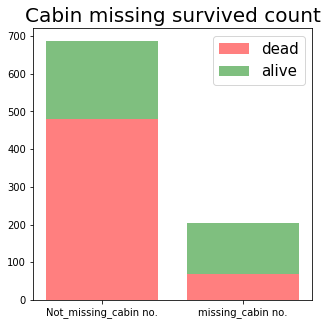

In [185]:
f, ax = plt.subplots(figsize=(5,5))
ax.set_title('Cabin missing survived count', size=20)

pos = range(2)
ax.bar( pos,
        train[train['Survived']==0].groupby(['Cabin_missing'])['Survived'].count().values, 
        color='r', 
        alpha=0.5, 
        align='center',
        tick_label=['Not_missing_cabin no.','missing_cabin no.'], 
        label='dead')
ax.bar(pos, 
        train[train['Survived']==1].groupby(['Cabin_missing'])['Survived'].count().values, 
        bottom=train[train['Survived']==0].groupby(['Cabin_missing'])['Survived'].count().values,
        color='g',
        alpha=0.5,
        align='center',
        tick_label=['Not_missing_cabin no.','missing_cabin no.'], 
        label='alive')
ax.legend(fontsize=15, loc='best')

#### *Those who have cabin number on their ticket have higher survival rate than those who don't.

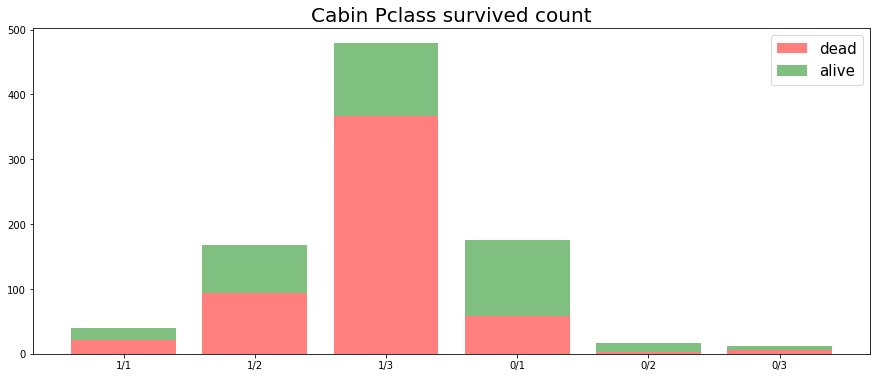

In [186]:
f, ax = plt.subplots(figsize=(15,6))
ax.set_title('Cabin Pclass survived count', size=20)

label=[]
for cabin_missing in train['Cabin_missing'].unique():
    for pclass_i in range(1,4):
        label.append('%s/%d'%(cabin_missing, pclass_i))

pos = range(6)
ax.bar( pos,
        train[train['Survived']==0].groupby(['Cabin_missing','Pclass'])['Survived'].count().values, 
        color='r', 
        alpha=0.5, 
        align='center',
        tick_label=label, 
        label='dead')

ax.bar(pos, 
    train[train['Survived']==1].groupby(['Cabin_missing','Pclass'])['Survived'].count().values, 
    bottom=train[train['Survived']==0].groupby(['Cabin_missing','Pclass'])['Survived'].count().values,
    color='g',
    alpha=0.5,
    align='center',
    tick_label=label, 
    label='alive')

ax.legend(fontsize=15, loc='best')

#### * Most of the passengers who have missing cabin no on their tickets are class 3.
#### * In each classes, those who have cabin on on their tickets have higher survival rate.

## Predictive Modelling

In [187]:
train[train['Age']!=-10]['Age'].mean()

29.69911764705882

In [188]:
# replace the null age value with average age
train['Age']=train['Age'].replace(-10,29)

In [189]:
#Convert all the factor variables to dummy variables

In [190]:
sexdummy=pd.get_dummies(train['Sex'],drop_first=True)

In [191]:
embarkeddummy=pd.get_dummies(train['Embarked'],drop_first=True)

In [192]:
pclassdummy=pd.get_dummies(train['Pclass'],drop_first=True)

In [193]:
sibspdummy=pd.get_dummies(train['SibSp'],drop_first=True)

In [194]:
parchdummy=pd.get_dummies(train['Parch'],drop_first=True)

In [195]:
train['Sex']=sexdummy

In [196]:
train[['Embarked_Q','Embarked_S']]=embarkeddummy

In [197]:
train[['Pclass_2','Pclass_3']]=pclassdummy

In [198]:
train[['SibSp_1','SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8']]=sibspdummy

In [199]:
train[['Parch_1','Parch_2','Parch_3','Parch_4','Parch_5','Parch_6']]=parchdummy

In [200]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,0,0,0,0
4,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.0500,NaN,...,0,0,0,0,0,0,0,0,0,0
5,0,3,"Moran, Mr. James",1,29.00,0,0,330877,8.4583,NaN,...,0,0,0,0,0,0,0,0,0,0
6,0,1,"McCarthy, Mr. Timothy J",1,54.00,0,0,17463,51.8625,E46,...,0,0,0,0,0,0,0,0,0,0
7,0,3,"Palsson, Master. Gosta Leonard",1,2.00,3,1,349909,21.0750,NaN,...,1,0,0,0,1,0,0,0,0,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.00,0,2,347742,11.1333,NaN,...,0,0,0,0,0,1,0,0,0,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.00,1,0,237736,30.0708,NaN,...,0,0,0,0,0,0,0,0,0,0


### 1.Logistic Regression

In [201]:
# First, define the X (predictor/independent) and the Y (predicted/dependent) variables:

Yvar= train.Survived.astype('float64')
Xvar = train.drop(['Survived','Pclass','Name', 'SibSp','Parch','Ticket','Cabin','Embarked'], axis=1).astype('float64') #retain only the independent variables (predictors)

In [202]:
Xvar.head()

,Sex,Age,Fare,Cabin_missing,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1.0,22.0,7.2500,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,38.0,71.2833,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,26.0,7.9250,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,35.0,53.1000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,35.0,8.0500,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
# Second, split the data into training and test portions:

X_train, X_test, Y_train, Y_test = train_test_split(Xvar, Yvar, test_size=0.25, random_state=7)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(668, 20) (668,)
(223, 20) (223,)


In [204]:
# Third, select the model approach for fitting: logistic regression

survivalreg=sklm.LogisticRegression(solver='liblinear') #solver is the type of optimization algorithm

In [205]:
#Grid Search

In [206]:
# set the gridsearch parameters for logistic regression
lg_param_grid={'penalty': ['l1', 'l2'], 'C': np.logspace(0,2,10)}

In [207]:
# define the gridsearch for logistic regression:

lg_grid = GridSearchCV(survivalreg, lg_param_grid, cv=5, scoring='accuracy')

In [208]:
#fit the gridsearch:

lg_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([  1.        ,   1.66810054,   2.7825594 ,   4.64158883,
         7.74263683,  12.91549665,  21.5443469 ,  35.93813664,
        59.94842503, 100.        ]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [209]:
#get the cross validation results from the gridsearch (be patient!)

lg_grid.cv_results_['mean_test_score']

array([0.81586826, 0.82035928, 0.81586826, 0.81736527, 0.81586826,
       0.81586826, 0.81736527, 0.81886228, 0.81586826, 0.81736527,
       0.81586826, 0.81437126, 0.81437126, 0.81137725, 0.81287425,
       0.81437126, 0.81287425, 0.81437126, 0.81287425, 0.81437126])

In [210]:
#which parameters give the best results?

lg_grid.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [211]:
#which is the best estimator, according to the grid search?

lg_grid.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
#getting the intercept/coefficients from the best estimator: 

lg_grid.best_estimator_.intercept_

array([3.27286162])

In [213]:
#getting the intercept/coefficients from the best estimator: 
lg_grid.best_estimator_.coef_

array([[-2.60257836e+00, -3.14944914e-02,  2.05693660e-03,
        -1.01319532e+00,  1.75674058e-01, -4.72788992e-01,
         2.22117191e-01, -7.99574982e-01,  2.23423941e-01,
        -1.74424892e-01, -1.26074593e+00, -1.08198272e+00,
        -7.41731344e-01, -1.05985652e+00,  4.07921573e-01,
         1.32243095e-01,  5.55521128e-02, -5.41986822e-01,
        -3.34077953e-01, -3.87649389e-01]])

In [214]:
features=Xvar.columns 
#these are the columns of independent variables in the caravan dataset.
features

Index(['Sex', 'Age', 'Fare', 'Cabin_missing', 'Embarked_Q', 'Embarked_S',
       'Pclass_2', 'Pclass_3', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6'],
      dtype='object')

In [215]:
pd.set_option("display.max_rows", None)
pd.DataFrame({'Variable': features, 'Coefficients':lg_grid.best_estimator_.coef_[0]})

,Variable,Coefficients
0,Sex,-2.602578
1,Age,-0.031494
2,Fare,0.002057
3,Cabin_missing,-1.013195
4,Embarked_Q,0.175674
5,Embarked_S,-0.472789
6,Pclass_2,0.222117
7,Pclass_3,-0.799575
8,SibSp_1,0.223424
9,SibSp_2,-0.174425


In [216]:
#get the predictions from the best estimator for the test sample:

lg_predictions_tt=lg_grid.best_estimator_.predict(X_test)

In [217]:
# How good is the prediction for the test sample?

print("Classification Report:\n",classification_report(Y_test, lg_predictions_tt))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       135
         1.0       0.73      0.61      0.67        88

    accuracy                           0.76       223
   macro avg       0.75      0.73      0.74       223
weighted avg       0.76      0.76      0.75       223



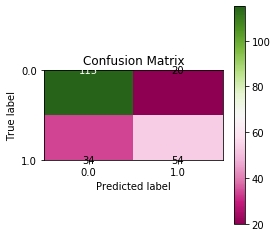

In [218]:
skplt.metrics.plot_confusion_matrix(Y_test, lg_predictions_tt, figsize=(4,4), cmap="PiYG")

### * The accuracy of the Logistic Regression model is 76%.

### 2. KNN Model

In [219]:
#Scaling
Xp=preprocessing.scale(Xvar)
Yp=Yvar

In [220]:
# Set aside 25% of data for out-of-training-sample test:

X2_train, X2_test, Y2_train, Y2_test = train_test_split(Xp, Yp, \
                                                            test_size=0.25, random_state=7)
print(X2_train.shape, Y2_train.shape)
print(X2_test.shape, Y2_test.shape)

(668, 20) (668,)
(223, 20) (223,)


In [221]:
#set the parameters for KNN gridsearch
knn_param_grid = {'n_neighbors': np.arange(1,20), 'weights':['uniform', 'distance']}

In [222]:
# set up the grid search with KNN
knnc_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring = 'accuracy')

In [223]:
# fit the KNN model using training sample
knnc_grid_search.fit(X2_train, Y2_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [224]:
#get the cross validation results from the gridsearch:

knnc_grid_search.cv_results_['mean_test_score']

array([0.73353293, 0.73353293, 0.75748503, 0.75449102, 0.78742515,
       0.77844311, 0.78443114, 0.77994012, 0.78742515, 0.78892216,
       0.80538922, 0.78892216, 0.79491018, 0.79041916, 0.79041916,
       0.80389222, 0.79341317, 0.7994012 , 0.79341317, 0.80239521,
       0.79191617, 0.8008982 , 0.78742515, 0.8008982 , 0.78443114,
       0.7994012 , 0.78293413, 0.7994012 , 0.77994012, 0.80389222,
       0.77844311, 0.7994012 , 0.77994012, 0.80389222, 0.77844311,
       0.80389222, 0.77994012, 0.80239521])

In [225]:
#which parameters gave the best results?

knnc_grid_search.best_params_

{'n_neighbors': 6, 'weights': 'uniform'}

In [226]:
# how does the model perform in predicting?

knnc_prediction_clf=knnc_grid_search.best_estimator_.predict(X2_test) #get the predictions using test data

In [227]:
# Evaluate how good the knn classification is:
cm_knn = confusion_matrix(Y2_test, knnc_prediction_clf)
print("Confusion Matrix:\n", cm_knn)
print("\n")
print("Classification Report:\n",classification_report(Y2_test, knnc_prediction_clf))

Confusion Matrix:
 [[121  14]
 [ 44  44]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.90      0.81       135
         1.0       0.76      0.50      0.60        88

    accuracy                           0.74       223
   macro avg       0.75      0.70      0.70       223
weighted avg       0.74      0.74      0.73       223



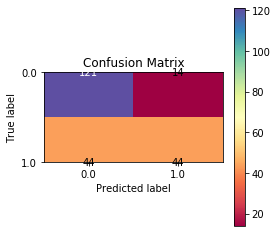

In [228]:
skplt.metrics.plot_confusion_matrix(Y2_test, knnc_prediction_clf, figsize=(4,4), cmap="Spectral")

### * The accuracy of the KNN model is 74%.

### 3. Tree-based Approach

In [229]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(Xvar, Yvar, test_size=0.25, random_state=7)
print(X3_train.shape, Y3_train.shape)
print(X3_test.shape, Y3_test.shape)

(668, 20) (668,)
(223, 20) (223,)


In [230]:
DT_survival = DecisionTreeClassifier(random_state=23)

In [231]:
# set the gridsearch parameters for decision tree
dtc_param_grid={'max_depth':[5, 7, 10], 'max_leaf_nodes':np.arange(2,10), 'max_features': [10, 15, 20]}

In [232]:
# define the gridsearch for decision tree classification:
dtc_grid_search = GridSearchCV(DT_survival, dtc_param_grid, cv=5, scoring='accuracy')

In [233]:
# Fit the model on training data
# Since we are using the training portion of the data, we are now "training" our model.
dtc_grid_search.fit(X3_train, Y3_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=23,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 7, 10], 'max_features': [10, 15, 20],
                         'max_leaf_nodes': array([2, 3, 4,

In [234]:
dtc_grid_search.cv_results_['mean_test_score']

array([0.60778443, 0.70508982, 0.76047904, 0.75449102, 0.76796407,
       0.7739521 , 0.79191617, 0.79491018, 0.6242515 , 0.75149701,
       0.79341317, 0.79640719, 0.81586826, 0.82185629, 0.82634731,
       0.82335329, 0.80538922, 0.80538922, 0.81287425, 0.83233533,
       0.83383234, 0.83532934, 0.83682635, 0.83682635, 0.60778443,
       0.70508982, 0.76047904, 0.75449102, 0.76796407, 0.7739521 ,
       0.79640719, 0.7994012 , 0.6242515 , 0.75149701, 0.79341317,
       0.79640719, 0.81586826, 0.82185629, 0.82634731, 0.82335329,
       0.80538922, 0.80538922, 0.81287425, 0.83233533, 0.83383234,
       0.83532934, 0.83682635, 0.83682635, 0.60778443, 0.70508982,
       0.76047904, 0.75449102, 0.76796407, 0.7739521 , 0.79640719,
       0.7994012 , 0.6242515 , 0.75149701, 0.79341317, 0.79640719,
       0.81586826, 0.82185629, 0.82634731, 0.82335329, 0.80538922,
       0.80538922, 0.81287425, 0.83233533, 0.83383234, 0.83532934,
       0.83682635, 0.83682635])

In [235]:
dtc_grid_search.best_params_

{'max_depth': 5, 'max_features': 20, 'max_leaf_nodes': 8}

In [236]:
dtc_grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=20, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=23, splitter='best')

In [237]:
# Get the predictions of the best decision tree classifier
DT_prediction_ctc=dtc_grid_search.best_estimator_.predict(X3_test)

In [238]:
# Evaluate how good the decision tree classification is:
cm_DTC = confusion_matrix(Y3_test, DT_prediction_ctc)
print("Confusion Matrix:\n", cm_DTC)
print("\n")
print("Classification Report:\n",classification_report(Y3_test, DT_prediction_ctc))

Confusion Matrix:
 [[116  19]
 [ 35  53]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       135
         1.0       0.74      0.60      0.66        88

    accuracy                           0.76       223
   macro avg       0.75      0.73      0.74       223
weighted avg       0.76      0.76      0.75       223



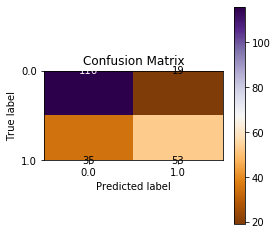

In [239]:
skplt.metrics.plot_confusion_matrix(Y2_test, DT_prediction_ctc, figsize=(4,4), cmap="PuOr")

### * The accuracy of the Decision-tree model is 76%.

### 3-a. Random Forest

In [240]:
# Select the model approach for fitting: RandomForest Classifier

DT_survival_rfc = RandomForestClassifier(random_state=23)

In [241]:
# set the gridsearch parameters for the RandomForest Classifier
dtfc_param_grid={'n_estimators': [10, 15, 20], 'max_depth':[5, 10, 15], \
                 'max_leaf_nodes':np.arange(2,10), 'min_samples_split':[5, 10, 15]}

In [242]:
# define the gridsearch for decision tree classification:
dtrfc_grid_search = GridSearchCV(DT_survival_rfc, dtfc_param_grid, cv=5, scoring='accuracy')

In [243]:
# Fit the model on training data
# Since we are using the training portion of the data, we are now "training" our model.
dtrfc_grid_search.fit(X3_train, Y3_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=23,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [244]:
dtrfc_grid_search.cv_results_['mean_test_score']

array([0.73952096, 0.76347305, 0.76197605, 0.73952096, 0.76347305,
       0.76197605, 0.73952096, 0.76347305, 0.76197605, 0.78592814,
       0.79041916, 0.78742515, 0.78592814, 0.79041916, 0.78742515,
       0.78592814, 0.79041916, 0.78742515, 0.80838323, 0.8008982 ,
       0.79790419, 0.80838323, 0.80389222, 0.79640719, 0.80988024,
       0.80688623, 0.80239521, 0.80389222, 0.80239521, 0.7994012 ,
       0.80389222, 0.80838323, 0.79790419, 0.79790419, 0.81137725,
       0.80538922, 0.8008982 , 0.7994012 , 0.80389222, 0.80389222,
       0.7994012 , 0.80538922, 0.8008982 , 0.80239521, 0.80838323,
       0.80389222, 0.8008982 , 0.80688623, 0.80389222, 0.80389222,
       0.80389222, 0.80239521, 0.81437126, 0.81287425, 0.80988024,
       0.80688623, 0.82185629, 0.80688623, 0.80389222, 0.81736527,
       0.81137725, 0.80688623, 0.81437126, 0.81437126, 0.81586826,
       0.82185629, 0.81586826, 0.80838323, 0.81137725, 0.80389222,
       0.80688623, 0.81886228, 0.73952096, 0.76347305, 0.76197

In [245]:
dtrfc_grid_search.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 8,
 'min_samples_split': 5,
 'n_estimators': 20}

In [246]:
dtrfc_grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)

In [247]:
# Get the predictions of the best Random Forest classifier
DTrfc_prediction_ctc=dtrfc_grid_search.best_estimator_.predict(X3_test)

In [248]:
# Evaluate how good the Random Forest classification is:
cm_DTC = confusion_matrix(Y3_test, DTrfc_prediction_ctc)
print("Confusion Matrix:\n", cm_DTC)
print("\n")
print("Classification Report:\n",classification_report(Y3_test, DTrfc_prediction_ctc))

Confusion Matrix:
 [[125  10]
 [ 39  49]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.93      0.84       135
         1.0       0.83      0.56      0.67        88

    accuracy                           0.78       223
   macro avg       0.80      0.74      0.75       223
weighted avg       0.79      0.78      0.77       223



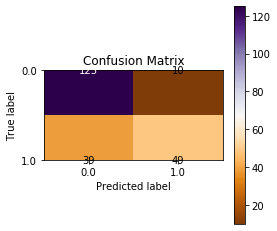

In [249]:
skplt.metrics.plot_confusion_matrix(Y3_test, DTrfc_prediction_ctc, figsize=(4,4), cmap="PuOr")

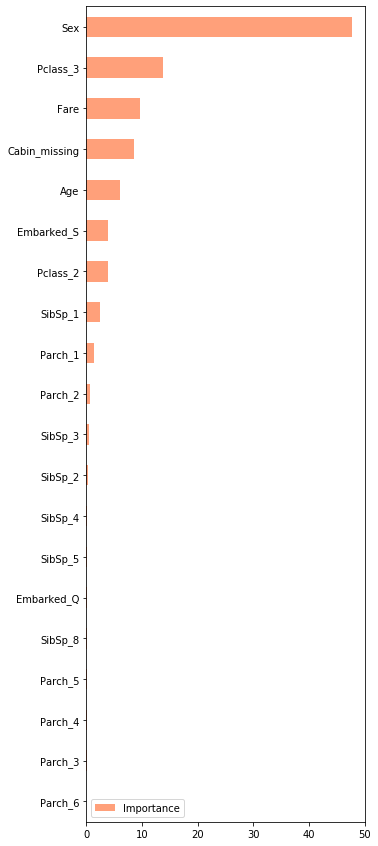

In [250]:
Importance = pd.DataFrame({'Importance':dtrfc_grid_search.best_estimator_.feature_importances_*100}, \
                          index=Xvar.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='lightsalmon', )
plt.gcf().set_size_inches(5, 15)

### * The accurancy of the Random Forest Model is 78%.

### 3-b. Boosting Classifier

In [251]:
# Select the model approach for fitting: Gradiant Boosting Classifier

DT_survival_bc = GradientBoostingClassifier(random_state=23)

In [252]:
# set the gridsearch parameters for the Gradiant Boosting Classifier
dtbc_param_grid={'n_estimators': [100, 125, 150], 'max_depth':[3,5,7,10], \
                 'max_leaf_nodes':np.arange(2,10), 'min_samples_split':[5,10,20]}

In [253]:
# define the gridsearch for Gradiant Boosting classification:
dtbc_grid_search = GridSearchCV(DT_survival_bc, dtfc_param_grid, cv=5, scoring='accuracy')

In [254]:
# Fit the model on training data
# Since we are using the training portion of the data, we are now "training" our model.
# Be patient -- it might take while to finish!

dtbc_grid_search.fit(X3_train, Y3_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  presort='auto',
  

In [255]:
dtbc_grid_search.cv_results_['mean_test_score']

array([0.80538922, 0.80538922, 0.80538922, 0.80538922, 0.80538922,
       0.80538922, 0.80538922, 0.80538922, 0.80538922, 0.80538922,
       0.80239521, 0.81137725, 0.80538922, 0.80239521, 0.81137725,
       0.80538922, 0.80239521, 0.81137725, 0.83083832, 0.8248503 ,
       0.82335329, 0.83083832, 0.8248503 , 0.82335329, 0.83083832,
       0.8248503 , 0.82335329, 0.82934132, 0.82934132, 0.83383234,
       0.82934132, 0.82934132, 0.83233533, 0.82934132, 0.82934132,
       0.83233533, 0.83383234, 0.83532934, 0.84281437, 0.83383234,
       0.83532934, 0.84431138, 0.83233533, 0.83532934, 0.83532934,
       0.83532934, 0.84131737, 0.84431138, 0.83532934, 0.83832335,
       0.83982036, 0.83233533, 0.83383234, 0.83233533, 0.83982036,
       0.83832335, 0.84131737, 0.83832335, 0.83832335, 0.84131737,
       0.83083832, 0.83383234, 0.83233533, 0.84281437, 0.83532934,
       0.83832335, 0.83832335, 0.83532934, 0.83682635, 0.83083832,
       0.83233533, 0.82934132, 0.80538922, 0.80538922, 0.80538

In [256]:
dtbc_grid_search.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 6,
 'min_samples_split': 10,
 'n_estimators': 20}

In [257]:
dtbc_grid_search.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=6,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=23, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [258]:
# Get the predictions of the best boosting classifier
DTbc_prediction_ctc=dtbc_grid_search.best_estimator_.predict(X3_test)

In [259]:
# Evaluate how good the boosting classification is:
cm_DTC = confusion_matrix(Y3_test, DTbc_prediction_ctc)
print("Confusion Matrix:\n", cm_DTC)
print("\n")
print("Classification Report:\n",classification_report(Y3_test, DTbc_prediction_ctc))

Confusion Matrix:
 [[116  19]
 [ 33  55]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       135
         1.0       0.74      0.62      0.68        88

    accuracy                           0.77       223
   macro avg       0.76      0.74      0.75       223
weighted avg       0.76      0.77      0.76       223



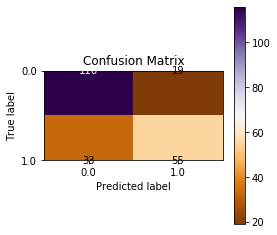

In [260]:
skplt.metrics.plot_confusion_matrix(Y2_test, DTbc_prediction_ctc, figsize=(4,4), cmap="PuOr")

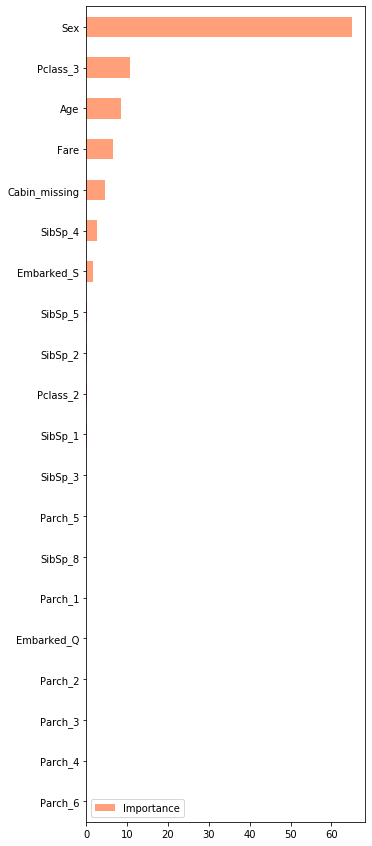

In [261]:
Importance = pd.DataFrame({'Importance':dtbc_grid_search.best_estimator_.feature_importances_*100}, \
                          index=Xvar.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='lightsalmon', )
plt.gcf().set_size_inches(5, 15)

### * The accuracy of the Boosting Model is 77%.

## Predict the survival for 'test.csv'

### Since the Random Forest has highest the accurancy, this model will be selected to predict the survival of the test dataset.

In [262]:
test['Cabin_missing']='0'
test.loc[test['Cabin'].isnull(), 'Cabin_missing']=1

In [263]:
test[test['Age']!=-10]['Age'].mean()

30.272590361445783

In [264]:
test['Age']=test['Age'].fillna(30)

In [265]:
#Convert all the factor avariables to dummy variables
sexdummy=pd.get_dummies(test['Sex'],drop_first=True)
embarkeddummy=pd.get_dummies(test['Embarked'],drop_first=True)
pclassdummy=pd.get_dummies(test['Pclass'],drop_first=True)
sibspdummy=pd.get_dummies(test['SibSp'],drop_first=True)
parchdummy=pd.get_dummies(test['Parch'],drop_first=True)

In [266]:
test['Sex']=sexdummy
test[['Embarked_Q','Embarked_S']]=embarkeddummy
test[['Pclass_2','Pclass_3']]=pclassdummy
test[['SibSp_1','SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8']]=sibspdummy
test[['Parch_1','Parch_2','Parch_3','Parch_4','Parch_5','Parch_6']]=parchdummy.drop(9,axis=1)

In [267]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,...,0,0,0,0,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,...,0,0,0,0,0,0,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,...,0,0,0,0,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,...,0,0,0,0,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,...,0,0,0,0,1,0,0,0,0,0


In [274]:
X = test.drop(['PassengerId','Pclass','Name', 'SibSp','Parch','Ticket','Cabin','Embarked'], axis=1).astype('float64') #retain only the independent variables (predictors)

In [275]:
X['Fare']=X['Fare'].fillna(X['Fare'].mean())

In [277]:
# Get the predictions of the best model: Random Forest classifier
test_prediction=dtrfc_grid_search.best_estimator_.predict(X)

In [278]:
test_prediction

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [279]:
test=test.drop(['Pclass','Name', 'SibSp','Parch','Ticket','Cabin','Embarked'], axis=1)

In [280]:
test['Survived']=test_prediction.astype(int)

In [281]:
final=test[['PassengerId','Survived']]

In [282]:
final.to_csv('final_submission.csv',index=False)

In [ ]:
#Try Logistic Regression Model

In [283]:
test.head()

,PassengerId,Sex,Age,Fare,Cabin_missing,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Survived
0,892,1,34.5,7.8292,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,893,0,47.0,7.0000,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,894,1,62.0,9.6875,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,895,1,27.0,8.6625,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,896,0,22.0,12.2875,1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,1


In [284]:
X2 = test.drop(['Survived','PassengerId'], axis=1).astype('float64') #retain only the independent variables (predictors)

In [285]:
X2['Fare']=X2['Fare'].fillna(X2['Fare'].mean())

In [286]:
X2.head()

,Sex,Age,Fare,Cabin_missing,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1.0,34.5,7.8292,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,47.0,7.0000,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,62.0,9.6875,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,27.0,8.6625,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,22.0,12.2875,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [287]:
lg_predictions_tt=lg_grid.best_estimator_.predict(X2)

In [302]:
test

,PassengerId,Sex,Age,Fare,Cabin_missing,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Survived
0,892,1,34.50,7.8292,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,893,0,47.00,7.0000,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,894,1,62.00,9.6875,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,895,1,27.00,8.6625,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,896,0,22.00,12.2875,1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,1
5,897,1,14.00,9.2250,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,898,0,30.00,7.6292,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,899,1,26.00,29.0000,1,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
8,900,0,18.00,7.2292,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,901,1,21.00,24.1500,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [303]:
test2=test[['PassengerId','Survived']]

In [306]:
test2['Survived']=lg_predictions_tt.astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [307]:
test2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [308]:
test2.to_csv('final_submission2.csv',index=False)